In [170]:
import numpy as np
import pandas as pd

### Reading and analysing datasets

In [120]:
athlete_df=pd.read_csv('athlete_events.csv')
nations_df=pd.read_csv('noc_regions.csv')

In [121]:
print(athlete_df.shape)
print(nations_df.shape)

(271116, 15)
(230, 3)


In [122]:
athlete_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [123]:
athlete_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [314]:
nations_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [125]:
athlete_df=athlete_df[athlete_df['Season']=='Summer']
athlete_df.shape

(222552, 15)

In [126]:
athlete_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [127]:
nations_df.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [128]:
df=athlete_df.merge(nations_df,on='NOC',how='left')

In [ ]:
df.head(2)

### Medal Count

In [130]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [131]:
df.duplicated().sum()

1385

In [132]:
df.drop_duplicates(inplace=True)

In [133]:
df.duplicated().sum()

0

In [134]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9030
Height     50500
Weight     52506
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     187090
region       370
notes     216770
dtype: int64

In [135]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [136]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [137]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


### Medal Count

In [138]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)
# this tally is wrong as team medals are counted many times

,Gold,Silver,Bronze
NOC,,,
USA,2472.0,1333.0,1197.0
URS,832.0,635.0,596.0
GBR,635.0,729.0,620.0
GER,592.0,538.0,649.0
ITA,518.0,474.0,454.0
...,...,...,...
AHO,0.0,1.0,0.0
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0


In [139]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [140]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
#this tally is approximately matching with wikipedia

In [141]:
medal_tally.head(3)

,NOC,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,URS,394.0,317.0,294.0
2,GBR,278.0,317.0,300.0


In [142]:
medal_tally[medal_tally['NOC']=='IND']
# this is right for india

,NOC,Gold,Silver,Bronze
53,IND,9.0,7.0,12.0


In [143]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [144]:
medal_tally.head(5)

,NOC,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,317.0,300.0,895.0
3,GER,235.0,261.0,283.0,779.0
4,FRA,234.0,256.0,287.0,777.0


In [145]:
years=df['Year'].unique().tolist()

In [146]:
years.sort()

In [147]:
years.insert(0,'Overall')

In [148]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [149]:
country=np.unique(df['region'].dropna().values).tolist()

In [150]:
country.sort()

In [151]:
country.insert(0,'Overall')

In [152]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [153]:
def medal_count(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

### Overall Analysis

In [154]:
df['Year'].unique().shape[0]-1

28

In [155]:
df['City'].unique().shape[0]

23

In [156]:
df['Sport'].unique().shape[0]

52

In [157]:
df['Event'].unique().shape[0]

651

In [158]:
df['Name'].unique().shape[0]

116122

In [159]:
df['region'].unique().shape[0]

206

In [160]:
countries_over_years=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [161]:
countries_over_years.rename(columns={'index':'Edition','Year':'Countries Participated'},inplace=True)

In [162]:
countries_over_years

,Edition,Countries Participated
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [163]:
import plotly.express as px

In [164]:
fig=px.line(countries_over_years,x="Edition",y="Countries Participated")
fig.show()

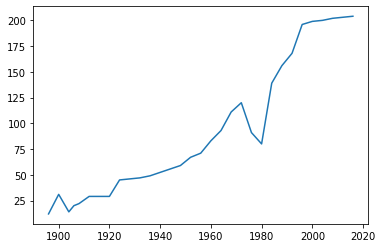

In [165]:
import matplotlib.pyplot as plt
plt.plot(countries_over_years['Edition'],countries_over_years['Countries Participated'])

In [166]:
df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


In [167]:
x=df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

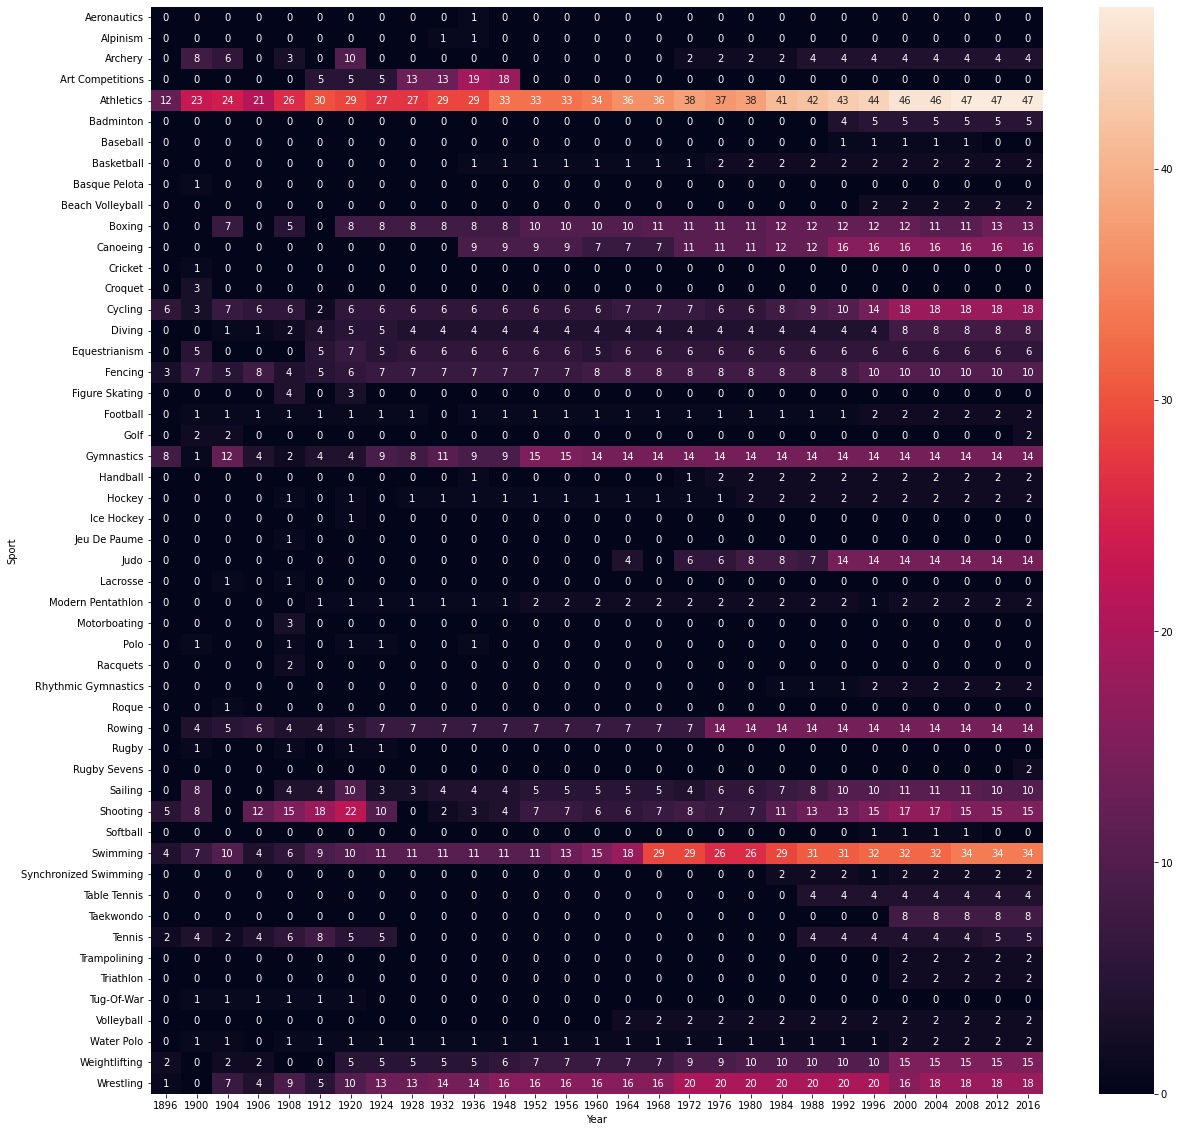

In [168]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [304]:
def most_decorated(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    temp_df = temp_df.groupby('Name').sum()[['Gold', 'Silver', 'Bronze']].reset_index()
    temp_df['Total'] = temp_df['Gold'] + temp_df['Silver'] + temp_df['Bronze']
    temp_df = temp_df.sort_values(by=['Total', 'Gold', 'Silver', 'Bronze'], ascending=False)
    x = pd.merge(temp_df, df[['Name', 'Sport', 'region','Medal']].dropna(subset=['Medal']), on='Name')
    x = x[['Name', 'Total', 'Gold', 'Silver', 'Bronze', 'Sport', 'region']].drop_duplicates('Name')
    x = x.head(15)
    return x.reset_index(drop=True)

In [305]:
most_decorated(df,'Hockey')

,Name,Total,Gold,Silver,Bronze,Sport,region
0,Leslie Walter Claudius,4,3,1,0,Hockey,India
1,Udham Singh Kular,4,3,1,0,Hockey,India
2,Teun Floris de Nooijer,4,2,2,0,Hockey,Netherlands
3,"Luciana Paula ""Lucha"" Aymar",4,0,2,2,Hockey,Argentina
4,"Balbir Singh Dosanjh, Sr.",3,3,0,0,Hockey,India
5,Dhyan Chand Bais,3,3,0,0,Hockey,India
6,Randhir Singh Gentle,3,3,0,0,Hockey,India
7,Ranganathan Francis,3,3,0,0,Hockey,India
8,Rechelle Margaret Hawkes,3,3,0,0,Hockey,Australia
9,Richard James Allen,3,3,0,0,Hockey,India


In [253]:
temp_df = df.dropna(subset=['Medal'])
# temp_df=temp_df[temp_df['Sport']=='Swimming']
temp_df=temp_df.groupby('Name').sum()[['Gold','Silver','Bronze']].reset_index()
temp_df['Total']=temp_df['Gold']+temp_df['Silver']+temp_df['Bronze']
temp_df=temp_df.sort_values(by=['Total','Gold','Silver','Bronze'],ascending=False)
x=pd.merge(temp_df,df[['Name','Sport','region']],on='Name').drop_duplicates('Name')
x=x[['Name','Total','Gold','Silver','Bronze','Sport','region']]
x.head(15).reset_index(drop=True)

,Name,Total,Gold,Silver,Bronze,Sport,region
0,"Michael Fred Phelps, II",28,23,3,2,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,9,5,4,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,7,5,3,Gymnastics,Russia
3,Borys Anfiyanovych Shakhlin,13,7,4,2,Gymnastics,Russia
4,Edoardo Mangiarotti,13,6,5,2,Fencing,Italy
5,Takashi Ono,13,5,4,4,Gymnastics,Japan
6,Paavo Johannes Nurmi,12,9,3,0,Athletics,Finland
7,Birgit Fischer-Schmidt,12,8,4,0,Canoeing,Germany
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,8,3,1,Swimming,USA
9,Sawao Kato,12,8,3,1,Gymnastics,Japan


### Country wise

In [177]:
temp_df=df.dropna(subset=['Medal'])
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [189]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()
fig=px.line(final_df,x="Year",y="Medal")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

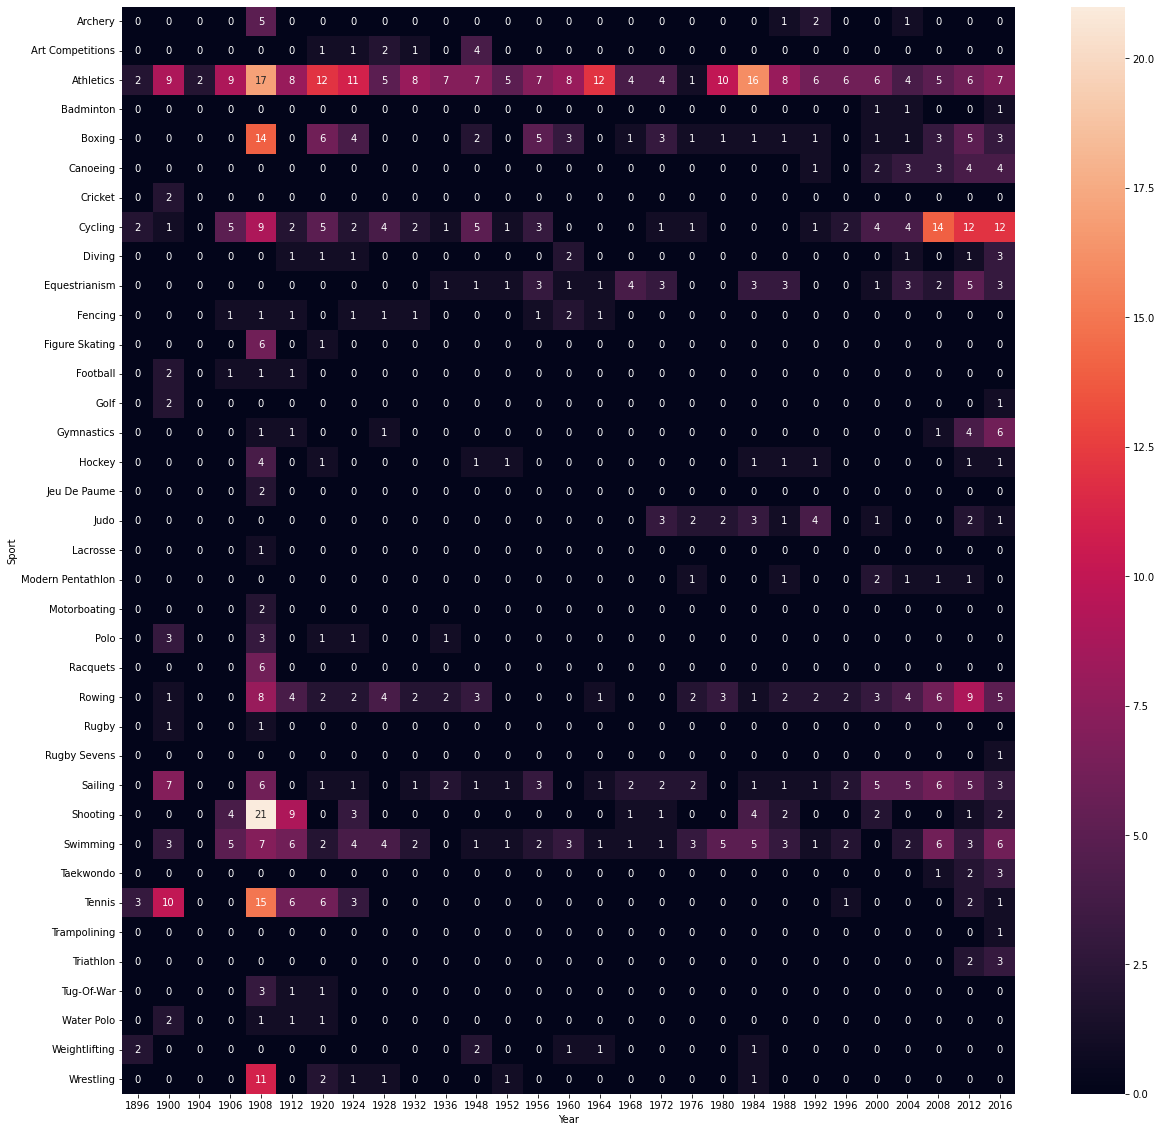

In [258]:
temp_df=df.dropna(subset=['Medal'])
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
new_df=temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [302]:
def most_decorated_country_wise(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    temp_df = temp_df.groupby(['Name']).sum()[['Gold', 'Silver', 'Bronze']].reset_index()
    temp_df['Total'] = temp_df['Gold'] + temp_df['Silver'] + temp_df['Bronze']
    temp_df = temp_df.sort_values(by=['Total', 'Gold', 'Silver', 'Bronze'], ascending=False)
    x = pd.merge(temp_df, df[['Name', 'Sport', 'region','Medal']].dropna(subset=['Medal']), on='Name')
    x = x[['Name', 'Total', 'Gold', 'Silver', 'Bronze', 'Sport', 'region']].drop_duplicates('Name')
    x = x.head(10)
    return x.reset_index(drop=True)

In [306]:
most_decorated_country_wise(df,"India")

,Name,Total,Gold,Silver,Bronze,Sport,region
0,Leslie Walter Claudius,4,3,1,0,Hockey,India
1,Udham Singh Kular,4,3,1,0,Hockey,India
2,"Balbir Singh Dosanjh, Sr.",3,3,0,0,Hockey,India
3,Dhyan Chand Bais,3,3,0,0,Hockey,India
4,Randhir Singh Gentle,3,3,0,0,Hockey,India
5,Ranganathan Francis,3,3,0,0,Hockey,India
6,Richard James Allen,3,3,0,0,Hockey,India
7,Shankar Pillay Laxman,3,2,1,0,Hockey,India
8,Prithipal Singh,3,1,1,1,Hockey,India
9,"Victor John ""V. J."" Peter",3,1,1,1,Hockey,India


### Players Statistics

In [315]:
import plotly.figure_factory as ff

In [339]:
x1=df.drop_duplicates(subset=['Name','region','Sport'])['Age'].dropna()
medal_df=df.dropna(subset=['Medal'])
x2=medal_df[medal_df['Medal']=="Gold"]['Age'].dropna()
x3=medal_df[medal_df['Medal']=="Silver"]['Age'].dropna()
x4=medal_df[medal_df['Medal']=="Bronze"]['Age'].dropna()

In [340]:
fig = ff.create_distplot([x1,x2,x3,x4], ['Overall Age','Gold','Silver','Bronze'],show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=850,height=600)
fig.show()

In [343]:

x = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Athletics',
                 'Swimming', 'Badminton', 'Gymnastics',
                 'Handball', 'Weightlifting', 'Wrestling',
                 'Water Polo', 'Hockey', 'Fencing',
                 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving',
                 'Tennis', 'Golf', 'Softball', 'Archery',
                 'Volleyball', 'Table Tennis', 'Baseball',
                 'Rhythmic Gymnastics',
                 'Beach Volleyball', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = medal_df[medal_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())

fig = ff.create_distplot(x, famous_sports, show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=850,height=600)

In [366]:
male=df[df['Sex']=="M"].groupby('Year').count()['Sex'].reset_index()
female=df[df['Sex']=="F"].groupby('Year').count()['Sex'].reset_index()
x=male.merge(female,on='Year',how='left')
x.fillna(0,inplace=True)

In [370]:
x.rename(columns={"Sex_x":"Male","Sex_y":"Female"},inplace=True)

In [373]:
fig=px.line(x,x='Year',y=["Male","Female"])
fig.show()

In [344]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
